## 이미지 처리 딥러닝
# AutoEncoder
- https://blog.keras.io/building-autoencoders-in-keras.html

<img src='https://www.researchgate.net/profile/Xifeng_Guo/publication/320658590/figure/fig1/AS:614154637418504@1523437284408/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there.png' />
(출처: https://www.researchgate.net/figure/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there_fig1_320658590)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

### MNIST 로딩

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(-1,28,28,1)/255
X_test = X_test.reshape(-1,28,28,1)/255

X_train.shape, X_test.shape, X_train[0].max(), X_train[0].dtype

((60000, 28, 28, 1), (10000, 28, 28, 1), 1.0, dtype('float64'))

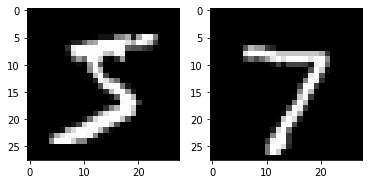

In [5]:
plt.subplot(1,2,1)
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
#plt.imshow(X_train[0,:,:,0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

### 인코더 생성

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose

In [7]:
input = Input((28,28,1))

x = Conv2D(32, (3,3), strides=2, padding='same', activation='relu')(input)
x = Conv2D(64, (3,3), strides=2, padding='same', activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

x = Flatten()(x)
latent = Dense(10)(x)

In [ ]:
'''model = keras.models.Sequential()
model.add(Conv2D(32, (3,3), strides=2, padding='same', activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), strides=2, padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(10))'''

- 인코더의 출력은 10개의 벡터값이다.
- 이 값을 잠재공간벡터(latent vector) 라고 한다.
- 즉, 28\*28\*1 의 이미지를 10개의 숫자로 축약하였다.

In [8]:
encoder = Model(input, latent)

encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                11530     
Total params: 104,202
Trainable params: 104,202
Non-trainable params: 0
_______________________________________________________

### 디코더 생성

In [9]:
input2 = Input((10,))

x2 = Dense(3*3*128, activation='relu')(input2)
x2 = Reshape((3,3,128))(x2)

x2 = Conv2DTranspose(64, (3,3), strides=2, activation='relu')(x2)
x2 = Conv2DTranspose(32, (3,3), strides=2, padding='same', activation='relu')(x2)

output = Conv2DTranspose(1, (3,3), strides=2, padding='same', activation='relu')(x2)

- Conv2DTranspose 설명 : https://datascience.stackexchange.com/questions/6107/what-are-deconvolutional-layers
<img src='https://i.stack.imgur.com/YyCu2.gif' />
<img src='https://i.stack.imgur.com/f2RiP.gif' />

In [10]:
decoder = Model(input2, output)

decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1152)              12672     
_________________________________________________________________
reshape (Reshape)            (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 64)          73792     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 105,217
Trainable params: 105,217
Non-trainable params: 0
_____________________________________________________

### 오토인코더 구성

In [11]:
autoencoder = Model(inputs=input, outputs=decoder(encoder(input)))

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
model (Functional)           (None, 10)                104202    
_________________________________________________________________
model_1 (Functional)         (None, 28, 28, 1)         105217    
Total params: 209,419
Trainable params: 209,419
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder.compile(loss='mse', optimizer='adam', metrics=['acc'])

In [20]:
#autoencoder.fit(X_train, X_train, batch_size=32,
#                epochs=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 228s 4ms/step - loss: 0.0267 - acc: 0.8079 - val_loss: 0.0181 - val_acc: 0.8077


- colab 결과
```
Epoch 1/50
469/469 [==============================] - 4s 7ms/step - loss: 0.0496 - acc: 0.8036 - val_loss: 0.0185 - val_acc: 0.8088
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0179 - acc: 0.8099 - val_loss: 0.0160 - val_acc: 0.8095
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0157 - acc: 0.8110 - val_loss: 0.0148 - val_acc: 0.8105
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0146 - acc: 0.8116 - val_loss: 0.0140 - val_acc: 0.8109
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0140 - acc: 0.8115 - val_loss: 0.0136 - val_acc: 0.8107
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0134 - acc: 0.8122 - val_loss: 0.0132 - val_acc: 0.8111
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0130 - acc: 0.8125 - val_loss: 0.0129 - val_acc: 0.8111
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0127 - acc: 0.8127 - val_loss: 0.0126 - val_acc: 0.8116
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0123 - acc: 0.8127 - val_loss: 0.0124 - val_acc: 0.8116
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0121 - acc: 0.8126 - val_loss: 0.0122 - val_acc: 0.8115
Epoch 11/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0118 - acc: 0.8132 - val_loss: 0.0120 - val_acc: 0.8117
Epoch 12/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0117 - acc: 0.8129 - val_loss: 0.0119 - val_acc: 0.8119
Epoch 13/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0115 - acc: 0.8130 - val_loss: 0.0117 - val_acc: 0.8117
Epoch 14/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0114 - acc: 0.8133 - val_loss: 0.0117 - val_acc: 0.8118
Epoch 15/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0112 - acc: 0.8133 - val_loss: 0.0115 - val_acc: 0.8120
Epoch 16/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0111 - acc: 0.8129 - val_loss: 0.0114 - val_acc: 0.8120
Epoch 17/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0109 - acc: 0.8130 - val_loss: 0.0113 - val_acc: 0.8119
Epoch 18/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0108 - acc: 0.8132 - val_loss: 0.0113 - val_acc: 0.8121
Epoch 19/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0108 - acc: 0.8134 - val_loss: 0.0112 - val_acc: 0.8118
Epoch 20/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0106 - acc: 0.8132 - val_loss: 0.0111 - val_acc: 0.8120
Epoch 21/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0105 - acc: 0.8136 - val_loss: 0.0110 - val_acc: 0.8120
Epoch 22/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0105 - acc: 0.8131 - val_loss: 0.0110 - val_acc: 0.8122
Epoch 23/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0104 - acc: 0.8135 - val_loss: 0.0110 - val_acc: 0.8121
Epoch 24/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0104 - acc: 0.8137 - val_loss: 0.0109 - val_acc: 0.8121
Epoch 25/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0103 - acc: 0.8134 - val_loss: 0.0108 - val_acc: 0.8122
Epoch 26/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0102 - acc: 0.8139 - val_loss: 0.0109 - val_acc: 0.8123
Epoch 27/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0101 - acc: 0.8135 - val_loss: 0.0110 - val_acc: 0.8119
Epoch 28/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0101 - acc: 0.8136 - val_loss: 0.0108 - val_acc: 0.8119
Epoch 29/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0100 - acc: 0.8137 - val_loss: 0.0107 - val_acc: 0.8120
Epoch 30/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0100 - acc: 0.8134 - val_loss: 0.0107 - val_acc: 0.8121
Epoch 31/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0099 - acc: 0.8139 - val_loss: 0.0107 - val_acc: 0.8123
Epoch 32/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0099 - acc: 0.8138 - val_loss: 0.0106 - val_acc: 0.8121
Epoch 33/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0098 - acc: 0.8137 - val_loss: 0.0107 - val_acc: 0.8122
Epoch 34/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0098 - acc: 0.8133 - val_loss: 0.0106 - val_acc: 0.8122
Epoch 35/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0097 - acc: 0.8138 - val_loss: 0.0105 - val_acc: 0.8122
Epoch 36/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0097 - acc: 0.8134 - val_loss: 0.0105 - val_acc: 0.8123
Epoch 37/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0097 - acc: 0.8135 - val_loss: 0.0106 - val_acc: 0.8122
Epoch 38/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0096 - acc: 0.8134 - val_loss: 0.0105 - val_acc: 0.8121
Epoch 39/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0096 - acc: 0.8135 - val_loss: 0.0105 - val_acc: 0.8123
Epoch 40/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0096 - acc: 0.8138 - val_loss: 0.0105 - val_acc: 0.8121
Epoch 41/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0095 - acc: 0.8136 - val_loss: 0.0105 - val_acc: 0.8123
Epoch 42/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0095 - acc: 0.8138 - val_loss: 0.0105 - val_acc: 0.8122
Epoch 43/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0095 - acc: 0.8139 - val_loss: 0.0105 - val_acc: 0.8120
Epoch 44/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0094 - acc: 0.8136 - val_loss: 0.0104 - val_acc: 0.8122
Epoch 45/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0095 - acc: 0.8137 - val_loss: 0.0105 - val_acc: 0.8120
Epoch 46/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0095 - acc: 0.8134 - val_loss: 0.0105 - val_acc: 0.8121
Epoch 47/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0094 - acc: 0.8141 - val_loss: 0.0104 - val_acc: 0.8122
Epoch 48/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0094 - acc: 0.8139 - val_loss: 0.0105 - val_acc: 0.8124
Epoch 49/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0093 - acc: 0.8136 - val_loss: 0.0105 - val_acc: 0.8121
Epoch 50/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0093 - acc: 0.8145 - val_loss: 0.0104 - val_acc: 0.8123
```

In [13]:
autoencoder.fit(X_train, X_train, batch_size=128,
                epochs=3, validation_split=0.2)

Epoch 1/3
375/375 [==============================] - 234s 611ms/step - loss: 0.0564 - acc: 0.8031 - val_loss: 0.0200 - val_acc: 0.8101
Epoch 2/3
375/375 [==============================] - 216s 577ms/step - loss: 0.0190 - acc: 0.8097 - val_loss: 0.0174 - val_acc: 0.8103
Epoch 3/3
375/375 [==============================] - 216s 575ms/step - loss: 0.0165 - acc: 0.8111 - val_loss: 0.0158 - val_acc: 0.8116


### 평가

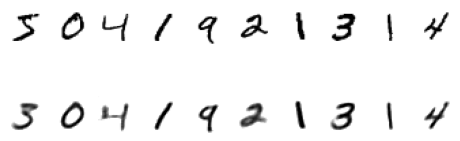

In [14]:
plt.figure(figsize=[8,3])

for i in range(10):
    r = autoencoder.predict(X_train[[i]])

    plt.subplot(2,10,1+i)
    plt.imshow(X_train[i,:,:,0], vmax=1, vmin=0, cmap='gray_r')
    plt.axis('off')

    plt.subplot(2,10,11+i)
    plt.imshow(r[0,:,:,0], vmax=1, vmin=0, cmap='gray_r')
    plt.axis('off')

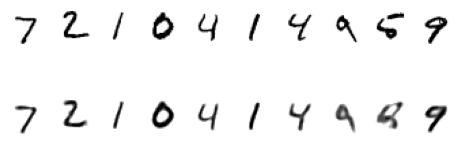

In [15]:
plt.figure(figsize=[8,3])

for i in range(10):
    r = autoencoder.predict(X_test[[i]])

    plt.subplot(2,10,1+i)
    plt.imshow(X_test[i,:,:,0], vmax=1, vmin=0, cmap='gray_r')
    plt.axis('off')

    plt.subplot(2,10,11+i)
    plt.imshow(r[0,:,:,0], vmax=1, vmin=0, cmap='gray_r')
    plt.axis('off')

### 시각화
- 잠재공간 10차원 중 앞 2차원을 활용

In [16]:
latent_value = encoder.predict(X_train)

In [17]:
latent_value.shape

(60000, 10)

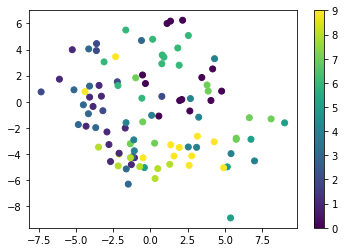

In [18]:
plt.scatter(latent_value[:100,0], latent_value[:100,1], c=y_train[:100])
plt.colorbar()

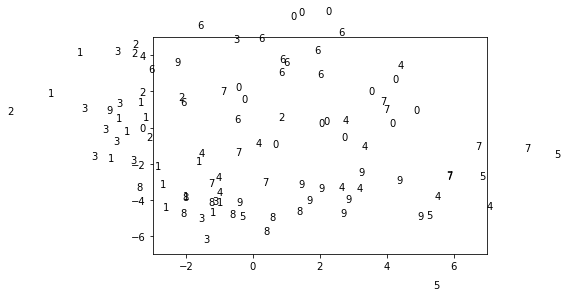

In [19]:
plt.axis([-3,7,-7,5])
for i in range(100):
    plt.text(latent_value[i,0], latent_value[i,1], str(y_train[i]))

### 도전과제
- 잠재공간이 2차원인 인코더를 만들자.
- 학습을 시킨 후, 테스트 데이터에 대한 2차원 산점도를 그려보자. (각 점은 해당 숫자로 표시)